In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
import plotly.offline as pyoff
import plotly.graph_objs as go

In [ ]:
import plotly.graph_objs as go

Reading Files

In [ ]:
fake = pd.read_csv('/content/drive/MyDrive/research/Fake-Final.csv')
real = pd.read_csv('/content/drive/MyDrive/research/Authentic-10K.csv')

Data Cleaning

In [ ]:
frames = [fake, real]

df = pd.concat(frames)

In [ ]:
df

,Unnamed: 0,F-type,articleID,category,content,date,domain,headline,label,relation,source
0,0,Satire,1,International,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",2019-03-14T13:34:14+00:00,channeldhaka.news,মুরগির হামলায় শেয়াল নিহত,0,Unrelated,Reporter
1,1,Satire,2,Miscellaneous,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...","সেম্বর ১৭, ২০১৮",earki.com,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,0,Unrelated,Reporter
2,2,Satire,3,Miscellaneous,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",earki.com,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,0,Unrelated,Reporter
3,3,Satire,4,Sports,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,2018-06-30T15:56:47+00:00,channeldhaka.news,অবসর নেয়ার ঘোষণা দিলেন মেসি !,0,Unrelated,Reporter
4,4,Satire,5,Miscellaneous,"নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",2013-03-05T21:55:45+00:00,motikontho.wordpress.com,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...",0,Unrelated,Reporter
...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,NaN,12573,Entertainment,"♦ গোলাপজলে আছে অ্যান্টি অক্সিডেন্ট, য...",2018-09-24 02:14:06,kalerkantho.com,ত্বকের বন্ধু গোলাপজল,1,NaN,NaN
9996,9996,NaN,12574,Entertainment,ঘরের পুরনো আসবাবের সঙ্গে মিশে থাকে নানা স্মৃতি...,2018-09-24 02:14:01,kalerkantho.com,ওল্ড ইজ গোল্ড,1,NaN,NaN
9997,9997,NaN,12575,Entertainment,"ধনেপাতার পাকোড়া উপকরণ ধনেপাতা ১ আঁটি, ময়দা আধা...",2018-09-24 03:26:17,kalerkantho.com,ধন্যি ধনেপাতা,1,NaN,NaN
9998,9998,NaN,12576,Entertainment,ফিট থাকতে যা যা করা দরকার তার সব করে উঠতে পারি...,2018-09-24 02:14:08,kalerkantho.com,ফাস্ট ফুড এড়িয়ে চলি,1,NaN,NaN


removing urls

In [ ]:
df_sub=df.groupby(['category', 'label'])['content'].count()

In [ ]:
df_sub

category       label
Crime          0          43
               1         144
Editorial      1         673
Education      0          30
               1         181
Entertainment  0         112
               1         551
Finance        0           3
               1         236
International  0         134
               1        1392
Lifestyle      0         108
               1         176
Miscellaneous  0         663
               1         444
National       0         152
               1        3814
Politics       0         100
               1         644
Sports         0          60
               1        1600
Technology     0          29
               1         145
Name: content, dtype: int64

In [ ]:
df_sub = df_sub.unstack().fillna(0)
df_sub

label,0,1
category,,
Crime,43.0,144.0
Editorial,0.0,673.0
Education,30.0,181.0
Entertainment,112.0,551.0
Finance,3.0,236.0
International,134.0,1392.0
Lifestyle,108.0,176.0
Miscellaneous,663.0,444.0
National,152.0,3814.0


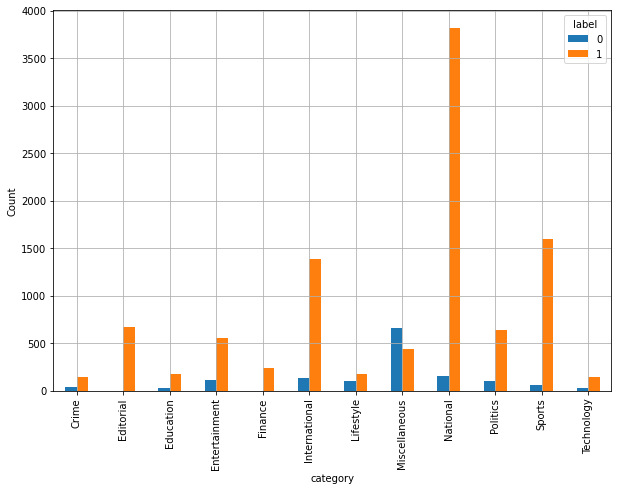

In [ ]:
# Visualize this data in bar plot
ax = (df_sub).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Count')
plt.show()

Now it can be said that true news is from subjects like politicsNews and worldnews.

In [ ]:
df_sub['Count']=df_sub[0]+df_sub[1]

Pie chart for Subjects

In [ ]:
import plotly.graph_objects as go

labels = df_sub.index
values = df_sub['Count']

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

In [ ]:
df_=df.copy()

In [ ]:
df_1=df_[df_['label']==1]

In [ ]:
df_1=df_1.groupby(['date'])['label'].count()

In [ ]:
df_1=pd.DataFrame(df_1)

In [ ]:
df_1['label']

date
2018-09-19 17:48:18    1
2018-09-19 17:48:19    1
2018-09-19 17:48:20    1
2018-09-19 17:48:21    2
2018-09-19 17:48:23    2
                      ..
2018-09-29 17:37:48    1
2018-09-29 17:37:51    1
2018-09-29 17:37:54    1
2018-09-29 17:37:56    1
2018-09-29 17:37:59    1
Name: label, Length: 8384, dtype: int64

In [ ]:
df_0=df_[df_['label']==0]

In [ ]:
df_0=df_0.groupby(['date'])['label'].count()

In [ ]:
df_0=pd.DataFrame(df_0)

Day-wise count of Fake and Real News

In [ ]:
plot_data = [
    go.Scatter(
        x=df_0.index,
        y=df_0['label'],
        name='True',
        #x_axis="OTI",
        #y_axis="time",
    ),
    go.Scatter(
        x=df_1.index,
        y=df_1['label'],
        name='Fake'
    )
    
]
plot_layout = go.Layout(
        title='Day-wise',
        yaxis_title='Count',
        xaxis_title='Time',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
from wordcloud import WordCloud, STOPWORDS 

 tag cloud (word cloud or wordle or weighted list in visual design) is a novelty visual representation of text data, typically used to depict keyword metadata (tags) on websites, or to visualize free form text. Tags are usually single words, and the importance of each tag is shown with font size or color.

Word Cloud for Fake news

Word Cloud for Real News

Combining 'Subject', 'title' and 'text' into one column.

In [ ]:
df_['news']=df_['category']+' '+df_['headline']+' '+df_['content']

In [ ]:
df_["news"] = df_['news'].str.replace(r'[\u09E6-\u09EF]','')

In [ ]:
all_news=pd.DataFrame(pd.Series(' '.join(df_['news']).split()).value_counts())

In [ ]:
allnews1=all_news.head(25)

Top 30 most frequently occuring words

In [ ]:
plot_data = [
    go.Bar(
        x=allnews1.index,
        y=allnews1[0],
        name='True',
        #x_axis="OTI",
        #y_axis="time",
        marker = dict(
            color = allnews1[0]
        )
    )
]
plot_layout = go.Layout(
        title='Top 25 words',
        yaxis_title='Count',
        xaxis_title='Word',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
fake_news=pd.DataFrame(pd.Series(' '.join(df_[df_['label']==1]['news']).split()).value_counts())

In [ ]:
fake_news30=fake_news.head(25)

Top 30 most Frequently occuring words from Fake news

In [ ]:
plot_data = [
    go.Bar(
        x=fake_news30.index,
        y=fake_news30[0],
        #name='True',
        #x_axis="OTI",
        #y_axis="time",
        marker = dict(
            color = fake_news30[0]
        )
    )
]
plot_layout = go.Layout(
        title='Top 25 words from Fake news',
        yaxis_title='Count',
        xaxis_title='Word',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

Top 30 most Frequently occuring words from True news

In [ ]:
real_news=pd.DataFrame(pd.Series(' '.join(df_[df_['label']==0]['news']).split()).value_counts())

In [ ]:
real_news30=real_news.head(25)

In [ ]:
plot_data = [
    go.Bar(
        x=real_news30.index,
        y=real_news30[0],
        #name='True',
        #x_axis="OTI",
        #y_axis="time",
        marker = dict(
            color = real_news30[0]
        )
    )
]
plot_layout = go.Layout(
        title='Top 25 words from Real news',
        yaxis_title='Count',
        xaxis_title='Word',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
import nltk, re, string, collections
from nltk.util import ngrams

In [ ]:
import re
import unicodedata
import nltk
from nltk.corpus import stopwords

Finding N-grams:

In the fields of computational linguistics and probability, an n-gram is a contiguous sequence of n items from a given sample of text or speech. The items can be phonemes, syllables, letters, words or base pairs according to the application. The n-grams typically are collected from a text or speech corpus.

In [ ]:
import nltk
nltk.download('stopwords')
stopWords = []
with open('/content/drive/MyDrive/research/bengali', 'r', encoding="utf8") as f:
    for row in f:  # iterate over the rows in the file
        row = row.replace("\n", "")
        stopWords.append(row)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!pip install bnltk

In [ ]:
!pip install git+https://github.com/banglakit/lemmatizer.git#egg=banglakit-lemmatizer

In [ ]:
from bnltk.stemmer import BanglaStemmer
from banglakit.lemmatizer import BengaliLemmatizer

In [ ]:
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
 # wnl = nltk.stem.WordNetLemmatizer()
  #lemmatizer = BengaliLemmatizer()
  stemmer = BanglaStemmer()
  #stopwords = nltk.corpus.stopwords.words('english')
  words = re.sub(r'[\u09E6-\u09EF]', '', text).split()
  return [stemmer.stem(word) for word in words if word not in stopWords]

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
words = basic_clean(''.join(str(df_['news'].tolist())))

Bi-grams for news

Finding top 30 most frequent Bi-grams

In [ ]:
bigram_all=(pd.Series(nltk.ngrams(words, 2)).value_counts())[:30]

In [ ]:
bigram_all=pd.DataFrame(bigram_all)
bigram_all

,0
"(আওয়ামী, লীগ)",4144
"((, সেপ্টেম্বর))",2124
"(এশিয়া, কাপ)",1847
"(জাতী, ঐক্য)",1418
"(সুপ, ফোর)",1305
"(শেখ, হাসিনা)",1202
"(প্রধানমন্ত্রী, শেখ)",1184
"(ড., কামাল)",944
"(খালেদা, জিয়)",906
"(সেপ্টেম্বর, ,)",885


In [ ]:
bg_a=bigram_all.copy()

In [ ]:
bg_a['in']=bg_a.index

In [ ]:
bg_a['in'] = bg_a.apply(lambda x: '('+x['in'][0]+', '+x['in'][1]+')',axis=1)

In [ ]:
plot_data = [
    go.Bar(
        x=bg_a['in'],
        y=bg_a[0],
        #name='True',
        #x_axis="OTI",
        #y_axis="time",
        marker = dict(
            color = 'blue'
        )
    )
]
plot_layout = go.Layout(
        title='Top 30 bigrams from News',
        yaxis_title='Count',
        xaxis_title='Word',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

Finding top 30 most frequent Tri-grams

In [ ]:
trigram_all=(pd.Series(nltk.ngrams(words, 3)).value_counts())[:30]

In [ ]:
trigram_all=pd.DataFrame(trigram_all)

In [ ]:
trigram_all

,0
"(বাংলাদেশ, সময়:, ঘণ্টা,)",737
"(ঘণ্টা,, সেপ্টেম্বর, ,)",703
"(সময়:, ঘণ্টা,, সেপ্টেম্বর)",697
"(প্রধানমন্ত্রী, শেখ, হাসিনা)",571
"(আওয়ামী, লীগ, সম্পাদক)",484
"(থান, ভারপ্রাপ্ত, কর্মকর্তা)",427
"(শনিব, (, সেপ্টেম্বর))",420
"(ভারপ্রাপ্ত, কর্মকর্তা, (ওসি))",407
"(জাতী, সংসদ, নির্বাচন)",401
"(ডিজিটাল, নিরাপত্তা, আইন)",396


In [ ]:
trigram_all['in']=trigram_all.index

In [ ]:
trigram_all['in'] = trigram_all.apply(lambda x: '('+x['in'][0]+', '+x['in'][1]+', '+x['in'][2]+')',axis=1)

In [ ]:
trigram_all

,0,in
"(বাংলাদেশ, সময়:, ঘণ্টা,)",737,"(বাংলাদেশ, সময়:, ঘণ্টা,)"
"(ঘণ্টা,, সেপ্টেম্বর, ,)",703,"(ঘণ্টা,, সেপ্টেম্বর, ,)"
"(সময়:, ঘণ্টা,, সেপ্টেম্বর)",697,"(সময়:, ঘণ্টা,, সেপ্টেম্বর)"
"(প্রধানমন্ত্রী, শেখ, হাসিনা)",571,"(প্রধানমন্ত্রী, শেখ, হাসিনা)"
"(আওয়ামী, লীগ, সম্পাদক)",484,"(আওয়ামী, লীগ, সম্পাদক)"
"(থান, ভারপ্রাপ্ত, কর্মকর্তা)",427,"(থান, ভারপ্রাপ্ত, কর্মকর্তা)"
"(শনিব, (, সেপ্টেম্বর))",420,"(শনিব, (, সেপ্টেম্বর))"
"(ভারপ্রাপ্ত, কর্মকর্তা, (ওসি))",407,"(ভারপ্রাপ্ত, কর্মকর্তা, (ওসি))"
"(জাতী, সংসদ, নির্বাচন)",401,"(জাতী, সংসদ, নির্বাচন)"
"(ডিজিটাল, নিরাপত্তা, আইন)",396,"(ডিজিটাল, নিরাপত্তা, আইন)"


In [ ]:
plot_data = [
    go.Bar(
        x=trigram_all['in'],
        y=trigram_all[0],
        #name='True',
        #x_axis="OTI",
        #y_axis="time",
        marker = dict(
            color = 'blue'
        )
    )
]
plot_layout = go.Layout(
        title='Top 30 trigrams from News',
        yaxis_title='Count',
        xaxis_title='tri-gram',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
fake_words = basic_clean(''.join(str(df_[df_['label']==1]['news'].tolist())))

Finding top 30 most frequent Bi-grams from Fake News

In [ ]:
bigram_fake=(pd.Series(nltk.ngrams(fake_words, 2)).value_counts())[:30]

In [ ]:
bigram_fake=pd.DataFrame(bigram_fake)

In [ ]:
bigram_fake

,0
"(আওয়ামী, লীগ)",4080
"((, সেপ্টেম্বর))",2116
"(এশিয়া, কাপ)",1837
"(জাতী, ঐক্য)",1417
"(সুপ, ফোর)",1305
"(প্রধানমন্ত্রী, শেখ)",1058
"(শেখ, হাসিনা)",1027
"(ড., কামাল)",941
"(খালেদা, জিয়)",898
"(সেপ্টেম্বর, ,)",885


In [ ]:
bigram_fake['in']=bigram_fake.index

In [ ]:
bigram_fake['in'] = bigram_fake.apply(lambda x: '('+x['in'][0]+', '+x['in'][1]+')',axis=1)

In [ ]:
plot_data = [
    go.Bar(
        x=bigram_fake['in'],
        y=bigram_fake[0],
        #name='True',
        #x_axis="OTI",
        #y_axis="time",
        marker = dict(
            color = 'Red'
        )
    )
]
plot_layout = go.Layout(
        title='Top 30 bi-grams from Fake News',
        yaxis_title='Count',
        xaxis_title='bi-gram',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

Finding top 30 most frequent Tri-grams from Fake News

In [ ]:
trigram_fake=(pd.Series(nltk.ngrams(fake_words, 3)).value_counts())[:30]

In [ ]:
trigram_fake=pd.DataFrame(trigram_fake)
trigram_fake

,0
"(বাংলাদেশ, সময়:, ঘণ্টা,)",737
"(ঘণ্টা,, সেপ্টেম্বর, ,)",703
"(সময়:, ঘণ্টা,, সেপ্টেম্বর)",697
"(প্রধানমন্ত্রী, শেখ, হাসিনা)",514
"(আওয়ামী, লীগ, সম্পাদক)",482
"(শনিব, (, সেপ্টেম্বর))",420
"(থান, ভারপ্রাপ্ত, কর্মকর্তা)",413
"(ডিজিটাল, নিরাপত্তা, আইন)",394
"(ভারপ্রাপ্ত, কর্মকর্তা, (ওসি))",392
"(বৃহস্পতিব, (, সেপ্টেম্বর))",387


In [ ]:
trigram_fake['in']=trigram_fake.index

In [ ]:
trigram_fake['in'] = trigram_fake.apply(lambda x: '('+x['in'][0]+', '+x['in'][1]+', '+x['in'][2]+')',axis=1)

In [ ]:
plot_data = [
    go.Bar(
        x=trigram_fake['in'],
        y=trigram_fake[0],
        #name='True',
        #x_axis="OTI",
        #y_axis="time",
        marker = dict(
            color = 'Red'
        )
    )
]
plot_layout = go.Layout(
        title='Top 30 tri-grams from Fake News',
        yaxis_title='Count',
        xaxis_title='tri-gram',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
true_words = basic_clean(''.join(str(df_[df_['label']==0]['news'].tolist())))

Finding top 30 most frequent Bi-grams from True News

In [ ]:
bigram_true=(pd.Series(nltk.ngrams(true_words, 2)).value_counts())[:30]

In [ ]:
bigram_true=pd.DataFrame(bigram_true)

In [ ]:
bigram_true

,0
"(|, দৈনিক)",192
"(দৈনিক, মতিকণ্ঠ)",192
"(-, Bengal)",181
"(Bengal, Beats)",181
"(শেখ, হাসিনা)",175
"(বিএনপি, শাখ)",159
"(সংবাদ, সম্মেলন)",143
"(প্রধানমন্ত্রী, শেখ)",126
"(মতিকণ্ঠ, নিজস্ব)",105
"(নাম, এক)",105


In [ ]:
bigram_true['in']=bigram_true.index

In [ ]:
bigram_true['in'] = bigram_true.apply(lambda x: '('+x['in'][0]+', '+x['in'][1]+')',axis=1)

In [ ]:
plot_data = [
    go.Bar(
        x=bigram_true['in'],
        y=bigram_true[0],
        #name='True',
        #x_axis="OTI",
        #y_axis="time",
        marker = dict(
            color = 'Green'
        )
    )
]
plot_layout = go.Layout(
        title='Top 30 bi-grams from True News',
        yaxis_title='Count',
        xaxis_title='bi-gram',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

Finding top 30 most frequent Tri-grams from Fake News

In [ ]:
trigram_true=(pd.Series(nltk.ngrams(true_words, 3)).value_counts())[:30]

In [ ]:
trigram_true=pd.DataFrame(trigram_true)

In [ ]:
trigram_true

,0
"(|, দৈনিক, মতিকণ্ঠ)",192
"(-, Bengal, Beats)",181
"(দৈনিক, মতিকণ্ঠ, নিজস্ব)",105
"(এক, সংবাদ, সম্মেলন)",82
"(ইসলামীর, বিএনপি, শাখ)",68
"(বৃহত্তর, জামায়া, ইসলামীর)",61
"(প্রধানমন্ত্রী, শেখ, হাসিনা)",57
"(বিশ্ব, দ্বিতী, সে)",52
"(দ্বিতী, সে, প্রধানমন্ত্রী)",52
"(জামায়া, ইসলামীর, বিএনপি)",48


In [ ]:
trigram_true['in']=trigram_true.index

In [ ]:
trigram_true['in'] = trigram_true.apply(lambda x: '('+x['in'][0]+', '+x['in'][1]+', '+x['in'][2]+')',axis=1)

In [ ]:
plot_data = [
    go.Bar(
        x=trigram_true['in'],
        y=trigram_true[0],
        #name='True',
        #x_axis="OTI",
        #y_axis="time",
        marker = dict(
            color = 'Green'
        )
    )
]
plot_layout = go.Layout(
        title='Top 30 tri-grams from True News',
        yaxis_title='Count',
        xaxis_title='tri-gram',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

word2vec:
1. Word2vec is a two-layer neural net that processes text by “vectorizing” words. Its input is a text corpus and its output is a set of vectors: feature vectors that represent words in that corpus. While Word2vec is not a deep neural network, it turns text into a numerical form that deep neural networks can understand.

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
y = df_['label'].values
#Converting X to format acceptable by gensim, removing annd punctuation stopwords in the process
X = []
stop_words = set(nltk.corpus.stopwords.words("english"))
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
for par in df_["news"].values:
    tmp = []
    sentences = nltk.sent_tokenize(par)
    for sent in sentences:
        sent = sent.lower()
        tokens = tokenizer.tokenize(sent)
        filtered_words = [w.strip() for w in tokens if w not in stop_words and len(w) > 1]
        tmp.extend(filtered_words)
    X.append(tmp)

#del data

In [ ]:
import gensim

In [ ]:
#Dimension of vectors we are generating
EMBEDDING_DIM = 100

#Creating Word Vectors by Word2Vec Method (takes time...)
w2v_model = gensim.models.Word2Vec(sentences=X, size=EMBEDDING_DIM, window=5, min_count=1)

In [ ]:
len(w2v_model.wv.vocab)

11499

In [ ]:
w2v_model["trump"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



array([-0.01821954, -0.00284977, -0.11724046, -0.01933566, -0.03506355,
       -0.03200306, -0.12426331,  0.02173267,  0.0199675 ,  0.04571982,
       -0.04300562, -0.05057302, -0.08823955,  0.00355199,  0.03139492,
        0.06922656, -0.01143538,  0.07861374, -0.08884369, -0.03801552,
        0.03393409, -0.04899989,  0.0127318 ,  0.02569504, -0.10245398,
       -0.08674407, -0.05651479, -0.08003715,  0.1898254 ,  0.03579617,
       -0.109201  ,  0.01215811, -0.03316475, -0.00880825, -0.01336495,
        0.0426571 , -0.03929397,  0.02774158,  0.03650485, -0.02786928,
       -0.157747  ,  0.02860115, -0.05926292,  0.08366237,  0.06763943,
       -0.01151119, -0.05019316, -0.06763738,  0.04079994, -0.03945997,
       -0.1659536 , -0.02746461,  0.00534706,  0.06897119,  0.05649871,
        0.04192747,  0.10869799, -0.04333293, -0.0423587 , -0.04735117,
        0.11384781,  0.0314815 ,  0.02289548, -0.05710213,  0.03802211,
       -0.01041829,  0.00644115, -0.15934594, -0.08158235,  0.09

Finding most similar words using word2vec

In [ ]:
w2v_model.wv.most_similar("trump")

[('white', 0.96944260597229),
 ('parts', 0.949213445186615),
 ('arabic', 0.9491260051727295),
 ('house', 0.9471672773361206),
 ('ref', 0.9469835162162781),
 ('improve', 0.9458216428756714),
 ('sit', 0.9457811117172241),
 ('dpid', 0.9456979036331177),
 ('government', 0.9456201791763306),
 ('parasa', 0.9454089403152466)]

In [ ]:
w2v_model.wv.most_similar("obama")

KeyError: ignored

In [ ]:
w2v_model.wv.most_similar("news")

Modeling (To Detect Fake news)

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df_['news'], 
                                                    df_['Target'], 
                                                    random_state=0)

Using CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)

In [ ]:
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

In [ ]:
from sklearn.metrics import roc_auc_score

# Predict the transformed test documents
predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC is 0.9984 which means this model is a good fit.

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions, labels=[0, 1]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, predictions, labels=[0, 1]))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions , labels=[0, 1])

Confusion Matrix

In [ ]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax= ax)
ax.set_ylabel('y_test')
ax.set_xlabel('predictions')

In [ ]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB 
vectorizer = CountVectorizer() 
X_train_transformed = vectorizer.fit_transform(X_train) 
X_test_transformed = vectorizer.transform(X_test)

clf = MultinomialNB(alpha=0.1) 
clf.fit(X_train_transformed, y_train)

y_predicted = clf.predict(X_test_transformed)

In [ ]:
print('AUC: ', roc_auc_score(y_test, y_predicted))

Confusion Matrix

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_predicted, labels=[0, 1]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_predicted, labels=[0, 1]))

In [ ]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax= ax)
ax.set_ylabel('y_test')
ax.set_xlabel('predictions')

Using TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer(min_df=5).fit(X_train)
len(vect.get_feature_names())

Logistic Regression

In [ ]:
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions, labels=[0, 1]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, predictions, labels=[0, 1]))

Confsion Matrix

In [ ]:
cm = confusion_matrix(y_test, predictions , labels=[0, 1])

In [ ]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax= ax)
ax.set_ylabel('y_test')
ax.set_xlabel('predictions')

In [ ]:
feature_names = np.array(vect.get_feature_names())

sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

In [ ]:

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Multinomial Naive Bayes

In [ ]:
vectorizer = TfidfVectorizer(min_df=3)
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

clf = MultinomialNB(alpha=0.1)
clf.fit(X_train_transformed, y_train)

# y_predicted_prob = clf.predict_proba(X_test_transformed)[:, 1]
y_predicted = clf.predict(X_test_transformed)

In [ ]:
print('AUC: ', roc_auc_score(y_test, y_predicted))

In [ ]:
print(metrics.confusion_matrix(y_test, y_predicted, labels=[0, 1]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_predicted, labels=[0, 1]))

In [ ]:
cm = confusion_matrix(y_test, y_predicted , labels=[0, 1])

In [ ]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax= ax)
ax.set_ylabel('y_test')
ax.set_xlabel('predictions')

N-gram Analysis

In [ ]:
#ngrams
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

Logistic Regression

In [ ]:

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

In [ ]:
print(metrics.confusion_matrix(y_test, predictions, labels=[0, 1]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, predictions, labels=[0, 1]))

In [ ]:
cm = confusion_matrix(y_test, predictions , labels=[0, 1])

In [ ]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax= ax)
ax.set_ylabel('y_test')
ax.set_xlabel('predictions')

In [ ]:
feature_names = np.array(vect.get_feature_names())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Now the winner is Logistic Regression with n-gram range 1, 2 for the detection of fake news.